# Import Libraries

In [1]:
import os
from pathlib import Path
import numpy as np
import json
import random
import matplotlib.pyplot as plt

from DatasetInterface import MSCOCOInterface
from pathlib import Path

In [2]:
root = Path('Data')
#imgs_path = root/'images'/'train2017'
imgs_path = root/'train2017'
#captions_path = root/'annotations'/'captions_train2017.json'
captions_path = root/'annotations_trainval2017'/'annotations'/'captions_train2017.json'

# load vocab
with open('vocabulary/idx_to_string.json') as json_file:
    idx_to_string_json = json.load(json_file)
        
idx_to_string = dict()
for key in idx_to_string_json:
    idx_to_string[int(key)] = idx_to_string_json[key]
    
with open('vocabulary/string_to_index.json') as json_file:
    string_to_index = json.load(json_file)


interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path,
    'freq_threshold': 1,
    'sequence_length': 20,
    'caps_per_img': 10,
    'idx_to_string': idx_to_string,
    'string_to_index': string_to_index
}

In [3]:
%%time
coco_interface = MSCOCOInterface(**interface_params)

Wall time: 5.85 s


In [4]:
print(coco_interface.caps_per_img)

5


In [5]:
img_idx = 3
file_name = coco_interface.coco.imgs[img_idx]
coco_interface.coco.get_captions(file_name)

['A zebra grazing on lush green grass in a field.',
 'Zebra reaching its head down to ground where grass is. ',
 'The zebra is eating grass in the sun.',
 'A lone zebra grazing in some green grass.',
 'a Zebra grazing on grass in a green open field.']

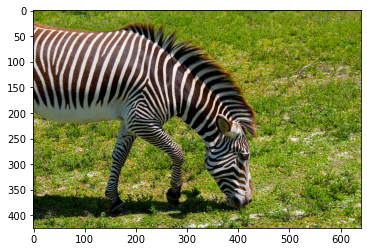

a zebra grazing on lush green grass in a field 
zebra reaching its head down to ground where grass is 
the zebra is eating grass in the sun 
a lone zebra grazing in some green grass 
a zebra grazing on grass in a green open field 


In [6]:
#idx = random.randint(0, len(coco_interface.coco.imgs))
idx = img_idx*coco_interface.caps_per_img
coco_interface.display_img_with_captions(idx)
for cap_idx in range(coco_interface.caps_per_img):
    
    cap = ''
    idx, X, y = coco_interface[idx]
    for word_idx in y:
        if word_idx != 0:
            cap += coco_interface.idx_to_string[word_idx.item()] + ' '
    idx += 1
    print(cap)

In [7]:
%%time
coco_interface.idx_to_string = None
coco_interface.string_to_index = None
coco_interface.vocabulary.build_vocab2(coco_interface.coco.captions_to_list())

Wall time: 43.5 s
